In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import load_npz
loaded_data=np.load("/Users/User/Downloads/emotion_matrix.npy",allow_pickle=True).item()

In [9]:
# Check the type of loaded_data to determine how to process it
print(type(loaded_data))

<class 'scipy.sparse._csr.csr_matrix'>


In [10]:
print(loaded_data)

  (0, 0)	0.1746031746031746
  (0, 1)	0.6666666666666666
  (0, 2)	0.07936507936507936
  (0, 3)	0.047619047619047616
  (0, 5)	0.031746031746031744
  (1, 0)	0.125
  (1, 1)	0.5
  (1, 3)	0.25
  (1, 5)	0.125
  (2, 0)	0.03333333333333333
  (2, 1)	0.7
  (2, 2)	0.06666666666666667
  (2, 3)	0.03333333333333333
  (2, 4)	0.06666666666666667
  (2, 5)	0.1
  (3, 0)	0.09090909090909091
  (3, 1)	0.9090909090909091
  (4, 0)	0.1
  (4, 1)	0.2
  (4, 3)	0.5
  (4, 4)	0.2
  (5, 0)	0.2
  (5, 1)	0.7
  (5, 2)	0.1
  (6, 1)	0.9473684210526315
  :	:
  (74289, 3)	0.3076923076923077
  (74289, 4)	0.07692307692307693
  (74289, 5)	0.15384615384615385
  (74290, 1)	1.0
  (74291, 0)	0.14285714285714285
  (74291, 1)	0.7142857142857143
  (74291, 4)	0.14285714285714285
  (74292, 0)	0.06153846153846154
  (74292, 1)	0.6717948717948717
  (74292, 2)	0.07179487179487179
  (74292, 3)	0.11282051282051282
  (74292, 4)	0.035897435897435895
  (74292, 5)	0.046153846153846156
  (74293, 1)	1.0
  (74294, 1)	0.8888888888888888
  (74294, 5)	

In [11]:
# Check the type and structure of the loaded data
print(f"Type: {type(loaded_data)}")
print(f"Shape: {loaded_data.shape if isinstance(loaded_data, np.ndarray) else 'N/A'}")
print(f"Contents: {loaded_data}")

Type: <class 'scipy.sparse._csr.csr_matrix'>
Shape: N/A
Contents:   (0, 0)	0.1746031746031746
  (0, 1)	0.6666666666666666
  (0, 2)	0.07936507936507936
  (0, 3)	0.047619047619047616
  (0, 5)	0.031746031746031744
  (1, 0)	0.125
  (1, 1)	0.5
  (1, 3)	0.25
  (1, 5)	0.125
  (2, 0)	0.03333333333333333
  (2, 1)	0.7
  (2, 2)	0.06666666666666667
  (2, 3)	0.03333333333333333
  (2, 4)	0.06666666666666667
  (2, 5)	0.1
  (3, 0)	0.09090909090909091
  (3, 1)	0.9090909090909091
  (4, 0)	0.1
  (4, 1)	0.2
  (4, 3)	0.5
  (4, 4)	0.2
  (5, 0)	0.2
  (5, 1)	0.7
  (5, 2)	0.1
  (6, 1)	0.9473684210526315
  :	:
  (74289, 3)	0.3076923076923077
  (74289, 4)	0.07692307692307693
  (74289, 5)	0.15384615384615385
  (74290, 1)	1.0
  (74291, 0)	0.14285714285714285
  (74291, 1)	0.7142857142857143
  (74291, 4)	0.14285714285714285
  (74292, 0)	0.06153846153846154
  (74292, 1)	0.6717948717948717
  (74292, 2)	0.07179487179487179
  (74292, 3)	0.11282051282051282
  (74292, 4)	0.035897435897435895
  (74292, 5)	0.046153846153846

In [12]:
# Convert sparse matrix to dense matrix
dense_matrix = loaded_data.toarray()

# Convert dense matrix to DataFrame
df = pd.DataFrame(dense_matrix)

# Print the DataFrame to check the data
print(df.head())

          0         1         2         3         4         5
0  0.174603  0.666667  0.079365  0.047619  0.000000  0.031746
1  0.125000  0.500000  0.000000  0.250000  0.000000  0.125000
2  0.033333  0.700000  0.066667  0.033333  0.066667  0.100000
3  0.090909  0.909091  0.000000  0.000000  0.000000  0.000000
4  0.100000  0.200000  0.000000  0.500000  0.200000  0.000000


In [13]:
df.head()

,0,1,2,3,4,5
0,0.174603,0.666667,0.079365,0.047619,0.000000,0.031746
1,0.125000,0.500000,0.000000,0.250000,0.000000,0.125000
2,0.033333,0.700000,0.066667,0.033333,0.066667,0.100000
3,0.090909,0.909091,0.000000,0.000000,0.000000,0.000000
4,0.100000,0.200000,0.000000,0.500000,0.200000,0.000000


In [14]:
# # Count the occurrences of each unique value in the emotions array
# unique, counts = np.unique(emotions, return_counts=True)
# emotion_counts = dict(zip(unique, counts))

# print(emotion_counts)

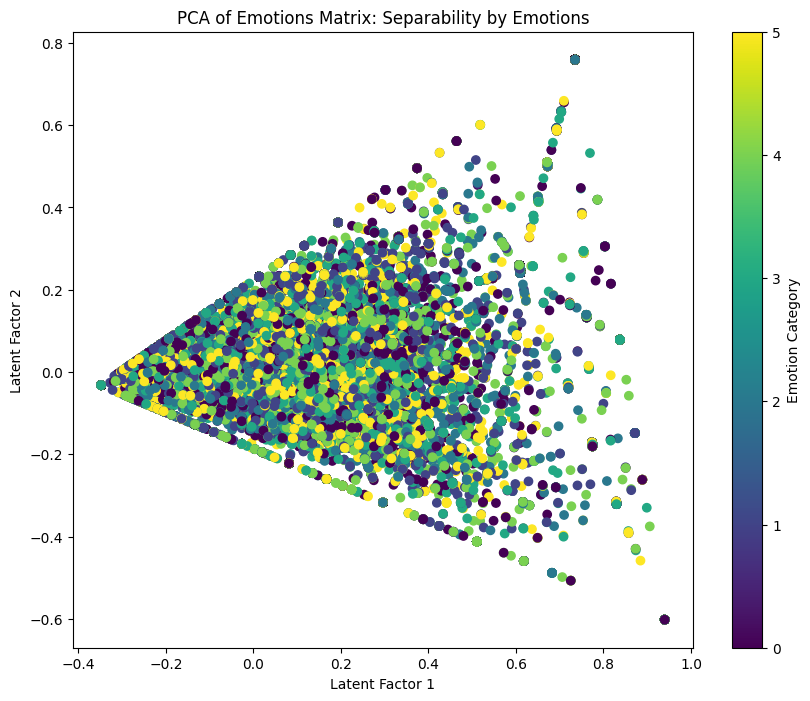

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# data for colormapping
emotions = np.random.randint(0, 6, size=74298)  # Assuming 6 different emotion labels
# Perform PCA to reduce dimensions
pca = PCA(n_components=2)
latent_factors = pca.fit_transform(df)
# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(latent_factors[:, 0], latent_factors[:, 1],c=emotions, cmap='viridis')
plt.xlabel('Latent Factor 1')
plt.ylabel('Latent Factor 2')
plt.title('PCA of Emotions Matrix: Separability by Emotions')
plt.colorbar(label='Emotion Category')
plt.show()


### PCA, which maximizes variance, LDA maximizes the ratio of the between-class variance to the within-class variance, thereby maximizing class separability.

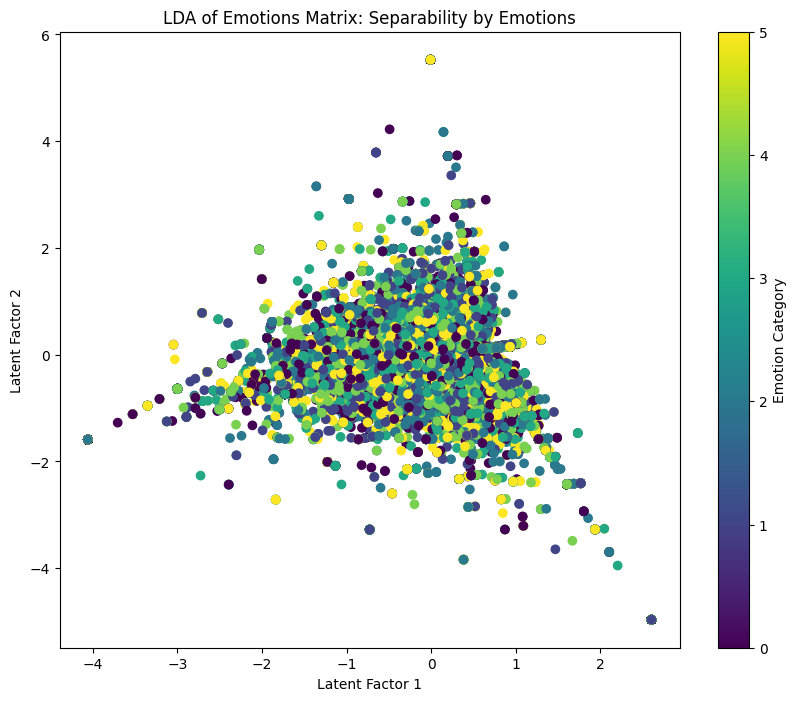

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming df is your DataFrame containing the data

# Generate data for colormapping (emotions)
emotions = np.random.randint(0, 6, size=74298)  # Assuming 6 different emotion labels

# Perform LDA to reduce dimensions
lda = LDA(n_components=2)
latent_factors = lda.fit_transform(df, emotions)

# Plotting
plt.figure(figsize=(10, 8))
scatter = plt.scatter(latent_factors[:, 0], latent_factors[:, 1], c=emotions, cmap='viridis')
plt.xlabel('Latent Factor 1')
plt.ylabel('Latent Factor 2')
plt.title('LDA of Emotions Matrix: Separability by Emotions')
plt.colorbar(label='Emotion Category')
plt.show()